In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import acquire

acquire.py functions loaded successfully


In [2]:
iris = sns.load_dataset('iris')

# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

In [3]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
142,5.8,2.7,5.1,1.9,virginica
82,5.8,2.7,3.9,1.2,versicolor
127,6.1,3.0,4.9,1.8,virginica
28,5.2,3.4,1.4,0.2,setosa
...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
1,4.9,3.0,1.4,0.2,setosa
57,4.9,2.4,3.3,1.0,versicolor


In [4]:
# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [5]:
X = train_scaled[['petal_width', 'sepal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width,sepal_width
0,1.009247,0.062538
1,-1.201998,0.887051
2,0.239600,-1.047900


In [7]:
train['cluster'] = kmeans.labels_

<ipython-input-7-2c11d432e536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cluster'] = kmeans.labels_


In [8]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,2
142,5.8,2.7,5.1,1.9,virginica,2
82,5.8,2.7,3.9,1.2,versicolor,2
127,6.1,3.0,4.9,1.8,virginica,0
28,5.2,3.4,1.4,0.2,setosa,1


In [9]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.646341,3.107317,5.392683,1.902439
1,5.054762,3.476190,1.473810,0.254762
2,5.818421,2.610526,4.265789,1.328947


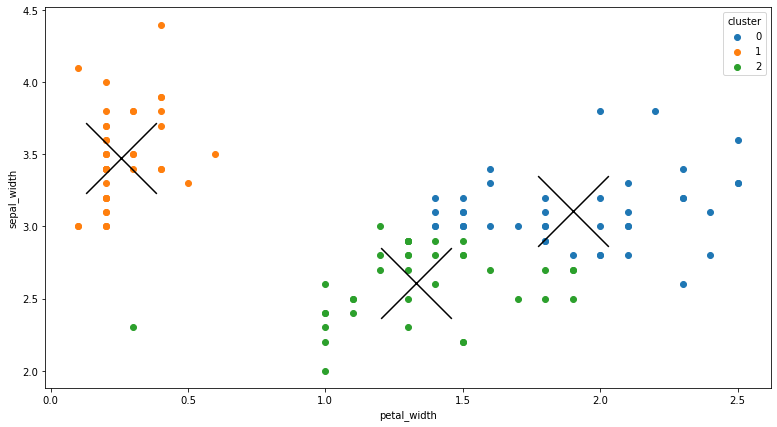

In [10]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Sepal Width', xlabel='Petal Length')

train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=5000, ax=ax, c='black')

In [11]:
kmeans.inertia_

62.439213145783945

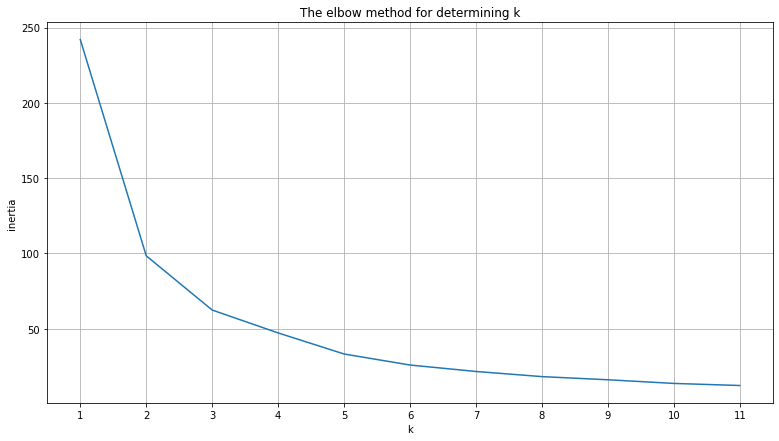

In [12]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [13]:
X = train_scaled[['petal_width', 'sepal_width', 'petal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [14]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width,sepal_width,petal_length
0,-1.201998,0.887051,-1.235687
1,0.261753,-0.924107,0.341961
2,1.113337,0.097273,1.052931


In [15]:
train['cluster'] = kmeans.labels_

<ipython-input-15-2c11d432e536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cluster'] = kmeans.labels_


In [16]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,1
142,5.8,2.7,5.1,1.9,virginica,1
82,5.8,2.7,3.9,1.2,versicolor,1
127,6.1,3.0,4.9,1.8,virginica,2
28,5.2,3.4,1.4,0.2,setosa,0


In [17]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.054762,3.476190,1.473810,0.254762
1,5.850000,2.665909,4.288636,1.345455
2,6.748571,3.122857,5.557143,1.980000


ValueError: could not convert string to float: 'setosa'

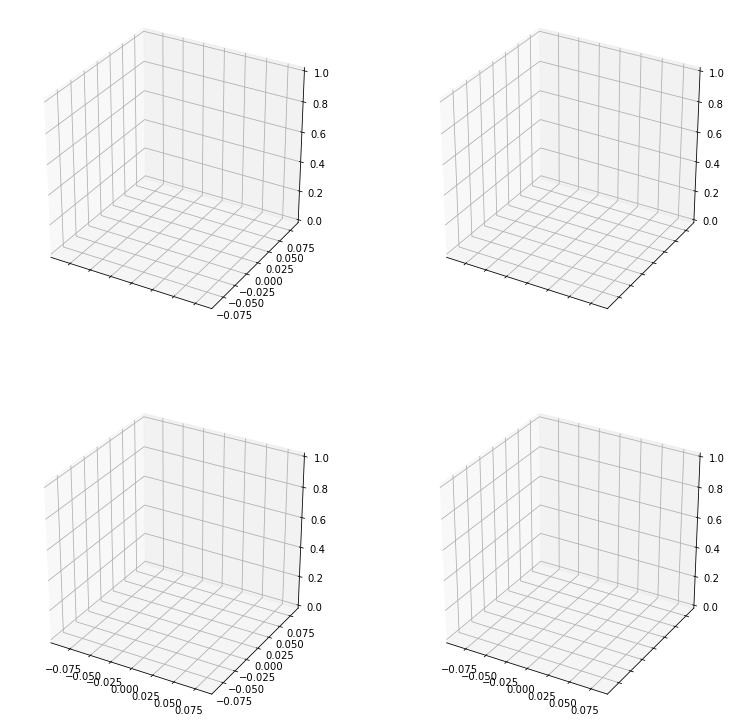

In [18]:
fig, axs = plt.subplots(
    2, 2,
    figsize=(13, 13),
    subplot_kw=dict(projection='3d'),
    sharex=True, sharey=True
)
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train).predict(train)
    ax.scatter('petal_width', 'sepal_width', 'petal_length', c=clusters)
    ax.set(title='k = {}'.format(k),
           xlabel='petal area',
           ylabel='sepal area')

In [ ]:
kmeans.inertia_

In [ ]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [ ]:
mall = acquire.get_mallcustomer_data()

In [ ]:
mall.head()

In [ ]:
train_and_validate, test = train_test_split(mall, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)